<a href="https://colab.research.google.com/github/Found-Bugs/Pembelajaran-Mesin/blob/Regresi/Tugas_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
# import package
import numpy as np
import pandas as pd

In [336]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/ML/Dataset/Regresi/insurance.csv')

In [337]:
# melihat beberapa data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [338]:
# mengecek ukuran data
data.shape

(1338, 7)

In [339]:
# informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [340]:
# deskripsi data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [341]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


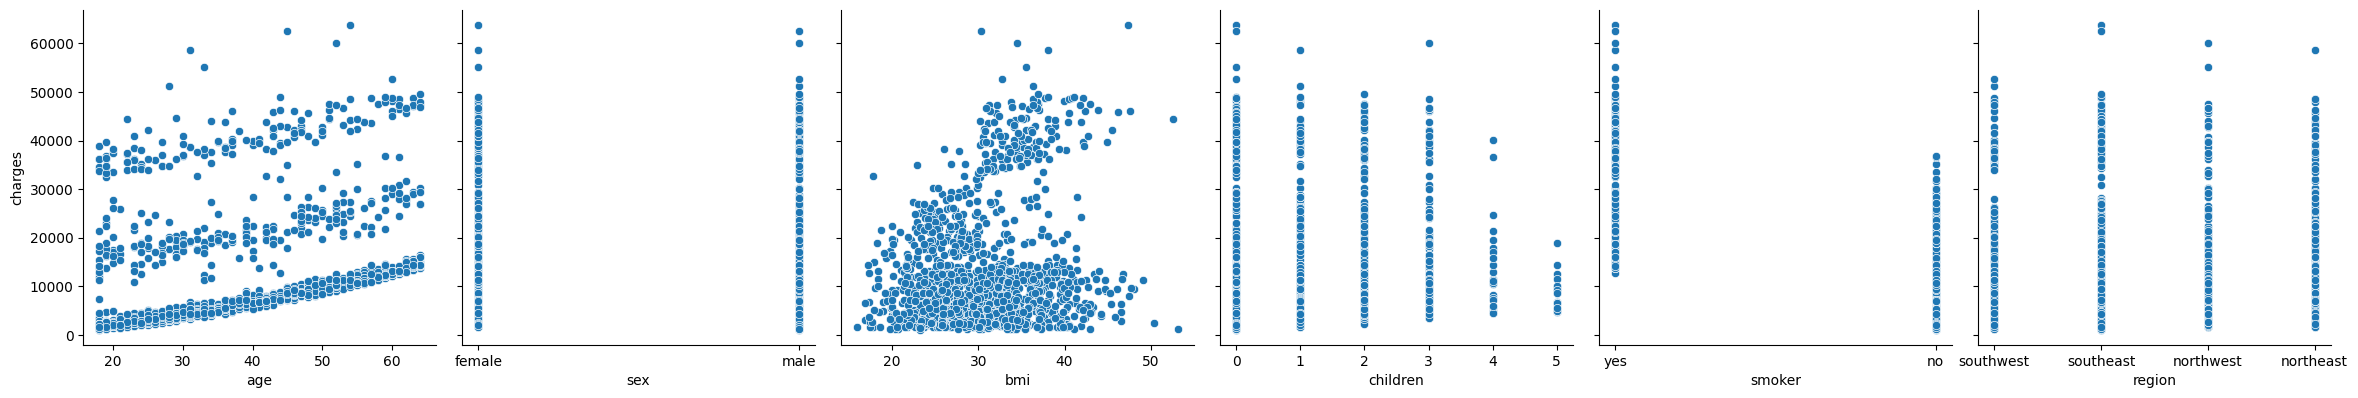

In [342]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

In [343]:
# melakukan encoding pada data-data kategorikal
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding

# melakukan standarisasi
std = StandardScaler()
data['age'] = std.fit_transform(data[['age']])
data['bmi'] = std.fit_transform(data[['bmi']])
data['children'] = std.fit_transform(data[['children']])

In [344]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,0,-0.453320,-0.908614,1,3,16884.92400
1,-1.509965,1,0.509621,-0.078767,0,2,1725.55230
2,-0.797954,1,0.383307,1.580926,0,2,4449.46200
3,-0.441948,1,-1.305531,-0.908614,0,1,21984.47061
4,-0.513149,1,-0.292556,-0.908614,0,1,3866.85520


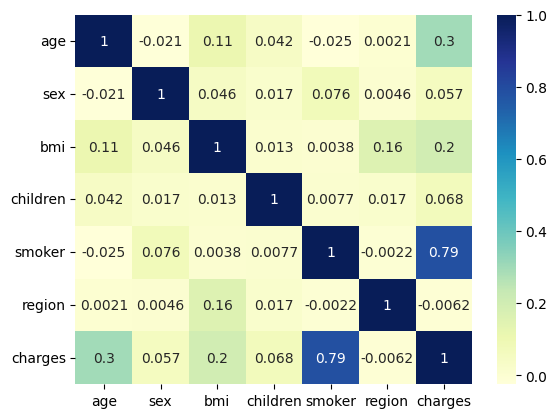

In [345]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [346]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data.drop(columns = 'charges');
y = data['charges']

In [347]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 936
Jumlah data uji: 402


In [348]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

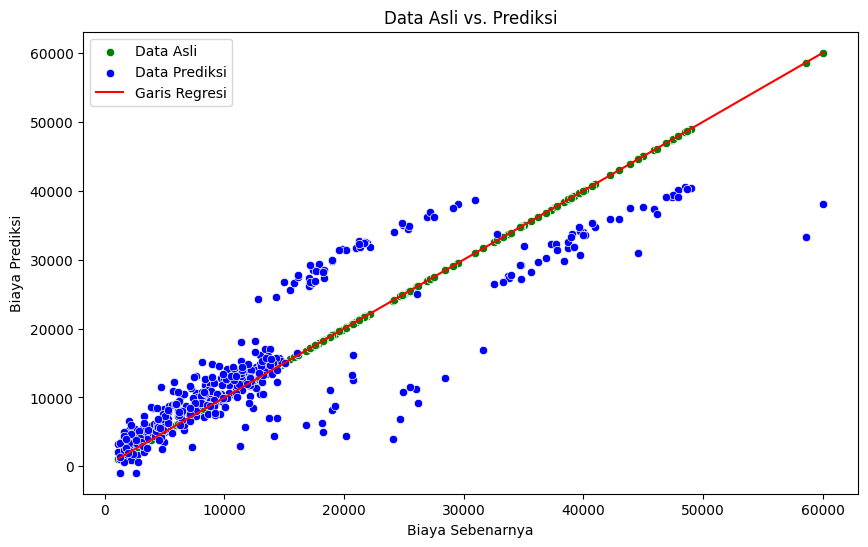

In [349]:
# Membuat figure dengan ukuran 10x6 untuk plot
plt.figure(figsize = (10, 6))

# Membuat scatterplot untuk data asli dengan sumbu x dan y sama (menampilkan garis identitas)
sns.scatterplot(x = y_test, y = y_test, color = 'green', label = 'Data Asli')

# Membuat scatterplot untuk data prediksi, membandingkan prediksi (y_pred) terhadap nilai asli (y_test)
sns.scatterplot(x = y_test, y = y_pred, color = 'blue', label = 'Data Prediksi')

# Menambahkan garis diagonal (garis regresi ideal) yang menunjukkan hasil prediksi sempurna
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', label = 'Garis Regresi')

plt.xlabel("Biaya Sebenarnya")
plt.ylabel("Biaya Prediksi")
plt.title("Data Asli vs. Prediksi")
plt.legend()
plt.show()

In [350]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MAE: 3935.56
MSE: 32191230.37
R-squared: 0.78
